In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
user_data_df = pd.read_csv('u.data.txt', sep = '\t', names = ('user_id','item_id','rating','timestamp'))
movie_id = pd.read_csv('Movie_Id_Titles.txt')

In [5]:
user_data_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_id.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
user_data_df.drop('timestamp', axis = 1, inplace = True)

#### Merge the two data frames

In [10]:
df = pd.merge(user_data_df,movie_id, on = 'item_id')

In [11]:
df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


Looking for Average movie rating

In [20]:
df.groupby('title')[['rating']].mean()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


Total Number of Ratings per title

In [19]:
df.groupby('title')[['rating']].count()

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


Average Rating by Title

In [17]:
rating_avg = pd.DataFrame(df.groupby('title')['rating'].mean())
rating_avg.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Include Rating Count

In [23]:
rating_avg['Rating Count'] = df.groupby('title')[['rating']].count()
rating_avg.head()

,rating,Rating Count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### Histogram Plot
This will provide insight in to the frequency of the number of ratings given by users which will help us narrow down our scope later on

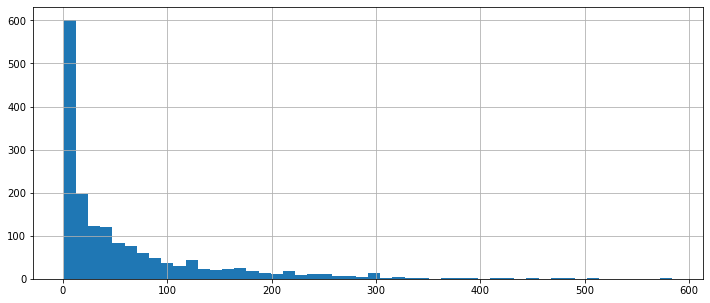

In [34]:
rating_avg['Rating Count'].hist(bins = 50, figsize = (12,5))
#sns.distplot(rating_avg['Rating Count'])

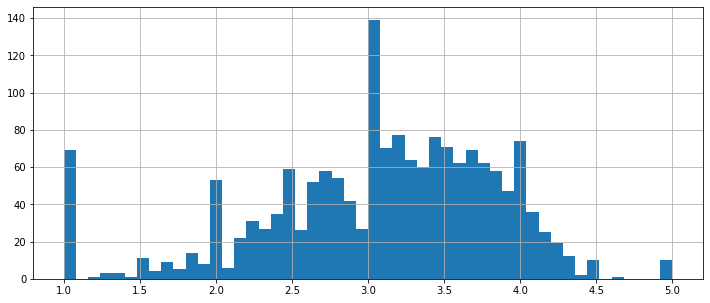

In [35]:
rating_avg['rating'].hist(bins = 50, figsize = (12,5))

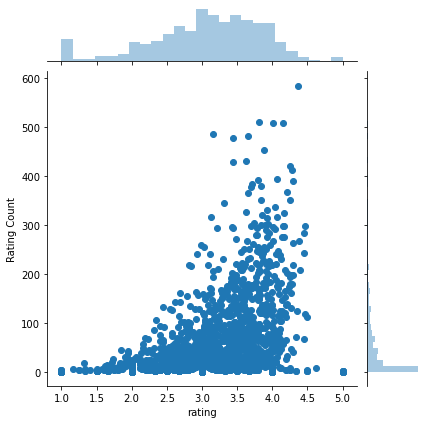

In [43]:
sns.jointplot(x = 'rating', y = 'Rating Count', data = rating_avg)

People are more likely to rate or vote for titles that are good, which explains why the number of rating counts increases as we move past the 3 star rating benchmark.

#### Movie Recommendation

Let's visualise each user id and their corresponding movie ratings, ie a pivot table

In [53]:
user_pivot = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
user_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The huge number of NaNs just mean that people have not watched or rated the movie which is expected. ie We don't expect any one user to have watched everything that's every made.

#### Top ten most rated movies

In [51]:
rating_avg.sort_values('Rating Count', ascending = False).head(10)

,rating,Rating Count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Tecnically speaking, what we want is to take each and every movie and get its correlation to everthing else, sort them in order of ranking. Therefore, with any given movie, the first movie(that is not itself) with the highest correlation value would be the one to recommend. Pair this up with the condition that a given user has seen said movie and you have your recommendation system. 

#### Using Starwars and Toy Story as examples:
We need the user ratings for each show

In [56]:
star_wars = user_pivot['Star Wars (1977)']
toy_story = user_pivot['Toy Story (1995)']

In [57]:
user_pivot.corrwith(star_wars)

c:\users\admin8\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\admin8\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [58]:
user_pivot.corrwith(toy_story)

title
'Til There Was You (1997)                0.534522
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.232118
12 Angry Men (1957)                      0.334943
187 (1997)                               0.651857
                                           ...   
Young Guns II (1990)                     0.146312
Young Poisoner's Handbook, The (1995)   -0.026402
Zeus and Roxanne (1997)                  0.447914
unknown                                  0.440959
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

Problem with the correlation tables we have here is that it shows the correlation of the selected movie with everything else, which isn't wrong but it isnt efficient. What we could do is limit the correlation to a subset of movies with say a minimum star rating(because you typically want to recommend good stuff) and a minimum rating count(to ensure that the recommended movie is enjoyed by a wider demographic)

In [61]:
star_wars_corr = pd.DataFrame()
star_wars_corr['correlation'] = user_pivot.corrwith(star_wars)
toy_story_corr = pd.DataFrame()
toy_story_corr ['correlation'] = user_pivot.corrwith(toy_story)

c:\users\admin8\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\admin8\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [62]:
star_wars_corr.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [63]:
toy_story_corr.head()

,correlation
title,
'Til There Was You (1997),0.534522
1-900 (1994),NaN
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857


Lets remove NaN values

In [64]:
star_wars_corr.dropna(inplace = True)
toy_story_corr.dropna(inplace = True)

In [65]:
toy_story_corr.head()

,correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


Coming back to the issue of wanting to limit the correlation table to involve movies with a minimum rating count, you'll notice that the current correlation table is a little wonky...

In [67]:
toy_story_corr.sort_values('correlation', ascending = False)

,correlation
title,
Roseanna's Grave (For Roseanna) (1997),1.0
"Substance of Fire, The (1996)",1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
"Newton Boys, The (1998)",1.0
...,...
"Slingshot, The (1993)",-1.0
Heavy (1995),-1.0
Stalker (1979),-1.0


One would expect result that would have similar genres(cartoon, disney, etc) like 101 dalmations, etc

In [68]:
star_wars_corr.sort_values('correlation', ascending = False)

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


Similarly, One would expect result that would have similar genres(scifi, disney, etc) like revenge of the sith, etc

The logic behind this is because for movies like star wars and toy story which is so heavily rated, its likely that users that watch this show have also watched and rated other shows which have low rating counts

#### Include rating counts into the correlation table so we can filter

In [71]:
toy_story_corr = toy_story_corr.join(rating_avg['Rating Count'])
toy_story_corr.head()

,correlation,Rating Count
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [72]:
star_wars_corr = star_wars_corr.join(rating_avg['Rating Count'])
star_wars_corr.head()

,correlation,Rating Count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [75]:
toy_story_corr.sort_values('correlation', ascending = False).head()

,correlation,Rating Count
title,,
Roseanna's Grave (For Roseanna) (1997),1.0,5
"Substance of Fire, The (1996)",1.0,4
"Stranger, The (1994)",1.0,3
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0,3
"Newton Boys, The (1998)",1.0,4


In [77]:
star_wars_corr.sort_values('correlation', ascending = False).head()

,correlation,Rating Count
title,,
Hollow Reed (1996),1.0,6
Stripes (1981),1.0,5
Star Wars (1977),1.0,584
Man of the Year (1995),1.0,9
"Beans of Egypt, Maine, The (1994)",1.0,2


Lets limit the rating count to a minimum of 100 counts; based off the histogram from earlier

In [83]:
star_wars_corr[star_wars_corr['Rating Count']>100].sort_values('correlation', ascending = False).head(10)

,correlation,Rating Count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [82]:
toy_story_corr[toy_story_corr['Rating Count']>100].sort_values('correlation', ascending = False).head(10)

,correlation,Rating Count
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


And now the recommendatio